<a href="https://colab.research.google.com/github/mking2014/final-4449-king/blob/main/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Examples: https://www.kaggle.com/code/uzzivirus/age-and-gender-detection#Normalizing-data

https://www.hackersrealm.net/post/gender-and-age-prediction-using-python#google_vignette

# Load Data

Gender: Male = 0, Female = 1


In [13]:
df = pd.read_csv('/content/data/age_gender.csv')
df = df.drop(columns = ['img_name'])
print(f"Dataset size: {df.shape}")
df.head()

Dataset size: (23705, 4)


,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [14]:
# Converting pixels into numpy array
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

# EDA

Text(0, 0.5, 'Count')

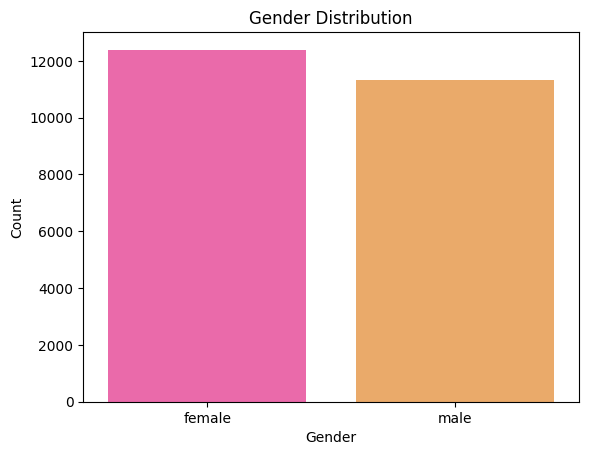

In [15]:
sns.countplot(x="gender", palette='spring', data=df.replace({"gender" : {1 : "male", 0 : "female"}}))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

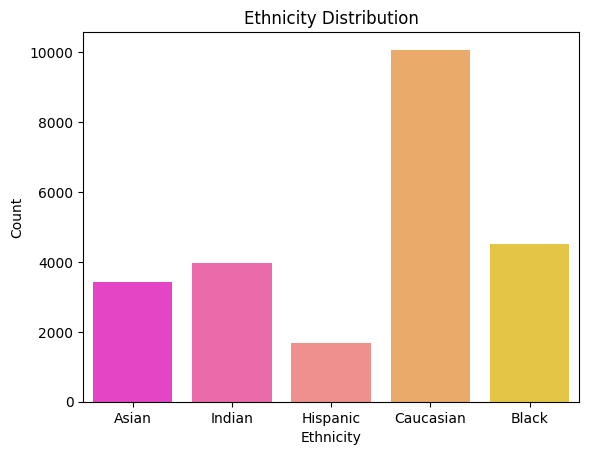

In [16]:
sns.countplot(x="ethnicity", palette='spring',
              data=df.replace({"ethnicity" : {0: "Caucasian", 1: "Black", 2: "Asian", 3:"Indian", 4:"Hispanic"}}))

plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

Text(0.5, 0, 'Age')

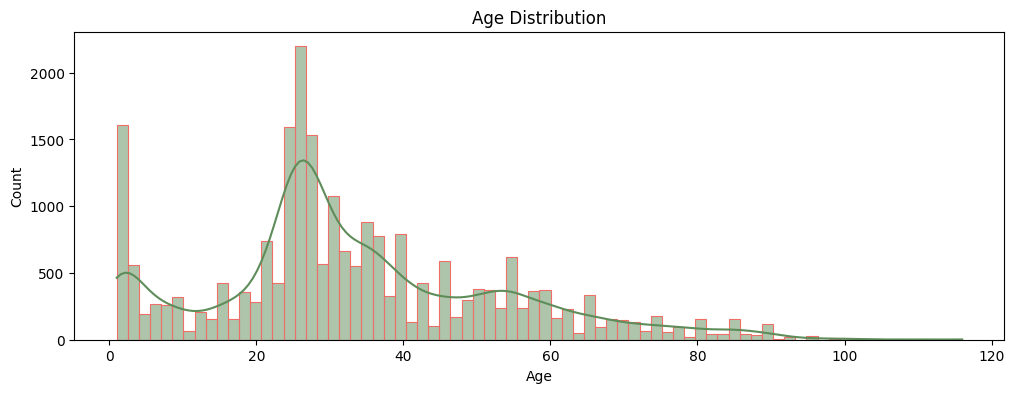

In [17]:
plt.figure(figsize=(12, 4))

sns.histplot(data = df, x='age', color = '#5e8d5a', edgecolor='#ee6f68', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')

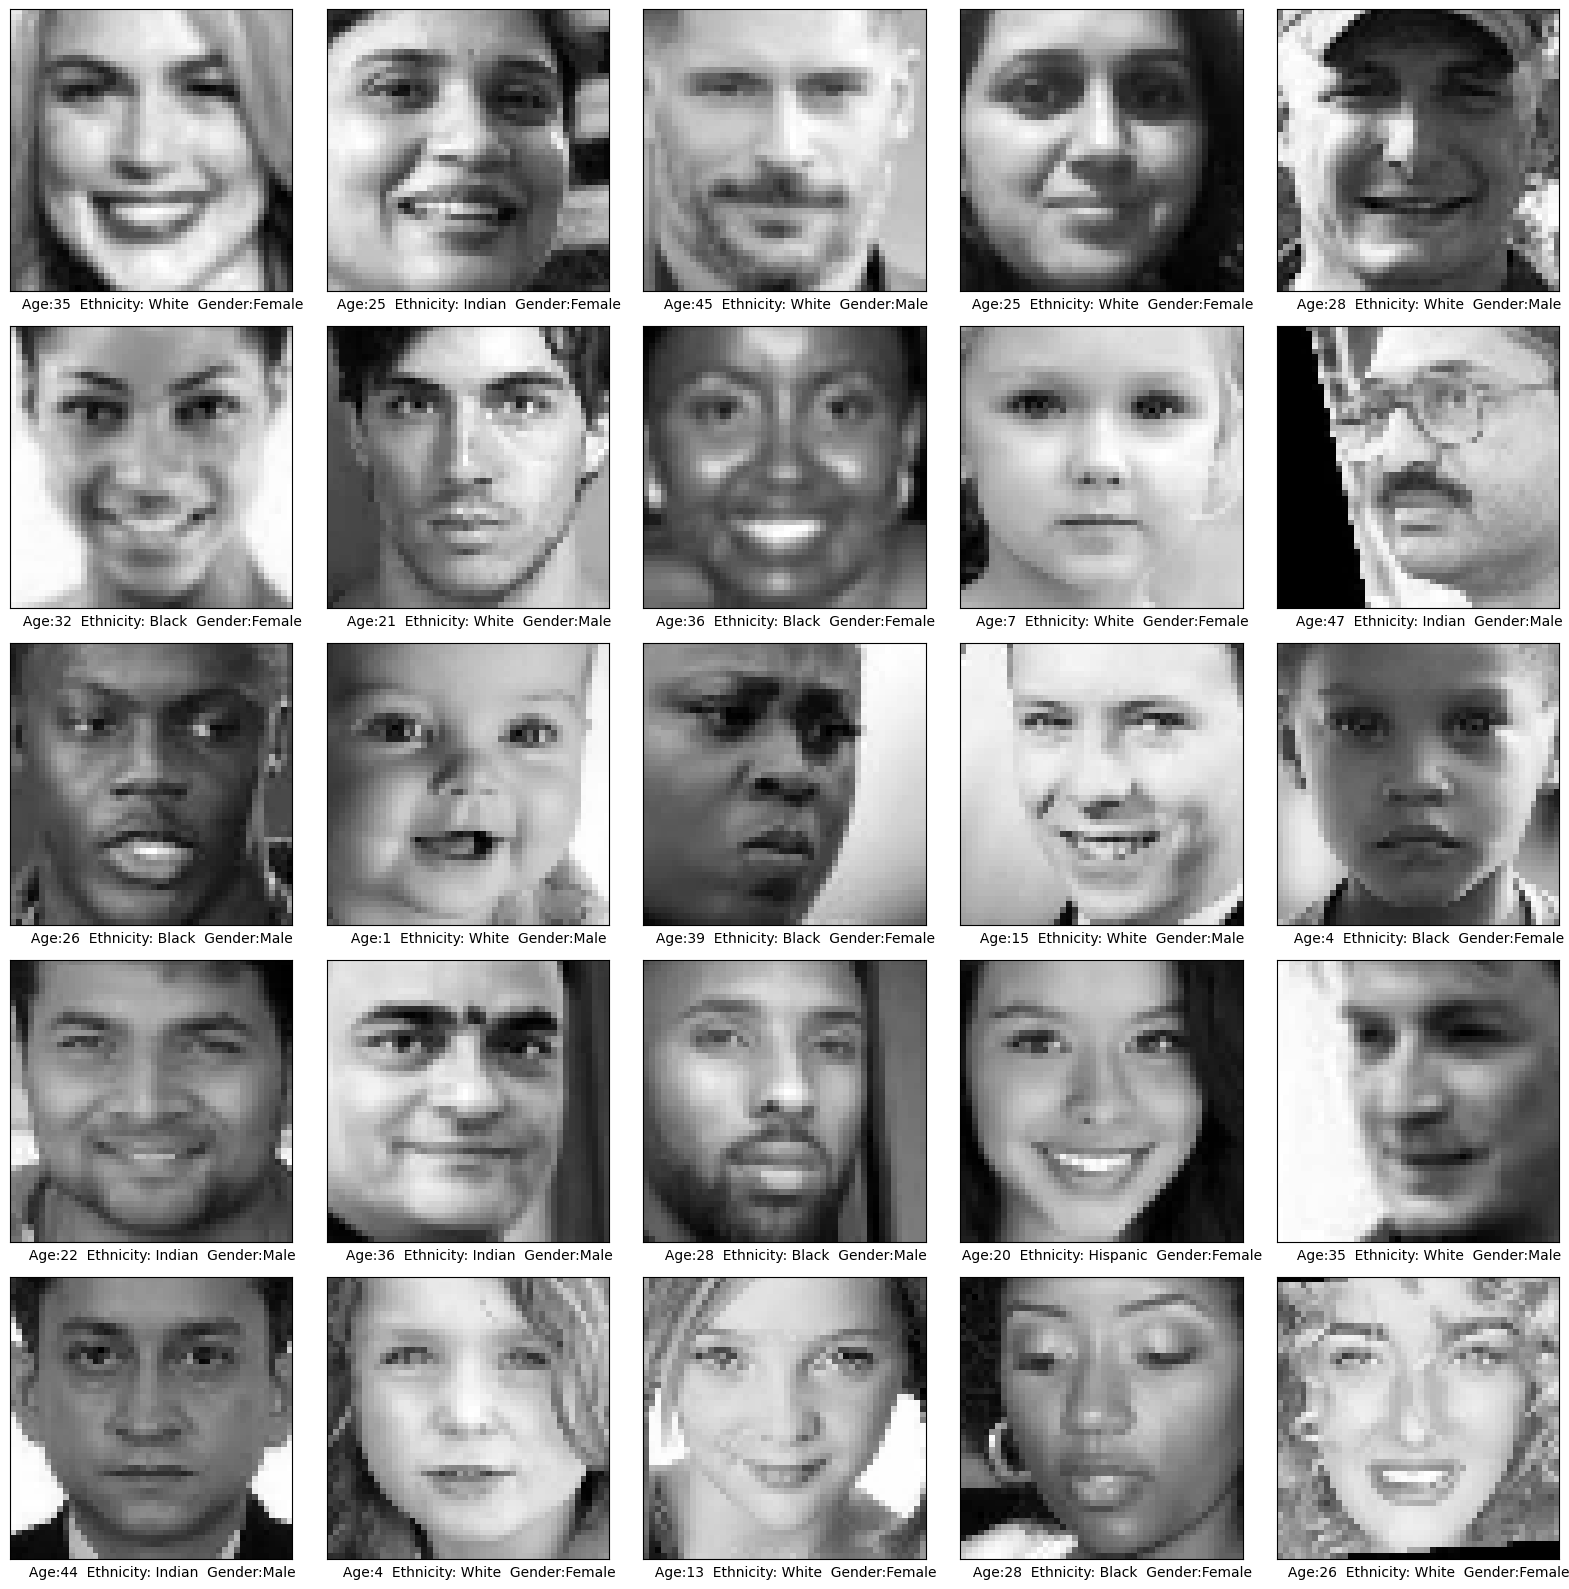

In [18]:
ethnicity_list = ["White", "Black", "Asian", "Indian", "Hispanic"]
gender_list = ['Male', 'Female']

plt.figure(figsize=(16,16))

for i,a in zip(np.random.randint(0, 23705, 25),range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48, 48), cmap ='gray')
    plt.xlabel(
        "     Age:"+str(df['age'].iloc[i])+
        "  Ethnicity: "+ str(ethnicity_list[df['ethnicity'].iloc[i]])+
        "  Gender:"+ str(gender_list[df['gender'].iloc[i]])
    )

plt.tight_layout()
plt.show()

# Data Preparation

This model will predict the age & gender usge the images. A classification model will be used to predict the gender (binary result) while a regression model will be used to predict the age.

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
df = df.drop(columns = ['ethnicity'])

In [23]:
train, test = train_test_split(df, test_size=0.85, random_state=42)
print(train.shape)
print(test.shape)

(3555, 3)
(20150, 3)


In [24]:
train.head()

,age,gender,pixels
18199,50,0,"[49.0, 53.0, 57.0, 49.0, 30.0, 45.0, 59.0, 68...."
19557,55,0,"[224.0, 170.0, 177.0, 192.0, 178.0, 181.0, 168..."
20132,58,0,"[35.0, 36.0, 39.0, 56.0, 59.0, 171.0, 169.0, 1..."
11849,31,1,"[58.0, 64.0, 55.0, 59.0, 66.0, 74.0, 66.0, 68...."
2100,16,0,"[246.0, 241.0, 158.0, 87.0, 57.0, 49.0, 45.0, ..."


In [39]:
X_train = train['pixels']
# normalizing pixels data
X_train = X_train/255

# reshape images
X_train = np.array(X_train.tolist())
X_train = X_train.reshape(-1,48,48, 1)
print(f"Shape of images: {X_train.shape}")

y_train_age = train['age']
y_train_gender = train['gender']
print(f"Age array shape: {(y_train_age.shape)}")
print(f"Gender array shape: {(y_train_gender.shape)}")

Shape of images: (3555, 48, 48, 1)
Age array shape: (3555,)
Gender array shape: (3555,)


In [32]:
input_shape = (48, 48, 1)

# Model Developmnet

In [35]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [36]:
inputs = Input((input_shape))

# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)

conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)

conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)

conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 46, 46, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 23, 23, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 21, 21, 64)   18496       ['max_pooling2d[0][0]']          
                                                                                              

In [40]:
history = model.fit(x=X_train, y=[y_train_gender, y_train_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
89/89 [==============================] - 20s 194ms/step - loss: 21.8761 - gender_out_loss: 0.8348 - age_out_loss: 21.0412 - gender_out_accuracy: 0.5236 - age_out_accuracy: 0.0380 - val_loss: 18.1332 - val_gender_out_loss: 0.6933 - val_age_out_loss: 17.4399 - val_gender_out_accuracy: 0.4712 - val_age_out_accuracy: 0.0478
Epoch 2/30
89/89 [==============================] - 17s 192ms/step - loss: 16.8213 - gender_out_loss: 0.7346 - age_out_loss: 16.0867 - gender_out_accuracy: 0.5257 - age_out_accuracy: 0.0457 - val_loss: 16.0757 - val_gender_out_loss: 0.7107 - val_age_out_loss: 15.3650 - val_gender_out_accuracy: 0.4712 - val_age_out_accuracy: 0.0478
Epoch 3/30
89/89 [==============================] - 18s 198ms/step - loss: 16.0570 - gender_out_loss: 0.7029 - age_out_loss: 15.3541 - gender_out_accuracy: 0.5137 - age_out_accuracy: 0.0457 - val_loss: 15.5576 - val_gender_out_loss: 0.6907 - val_age_out_loss: 14.8668 - val_gender_out_accuracy: 0.5288 - val_age_out_accuracy: 0.0478
E

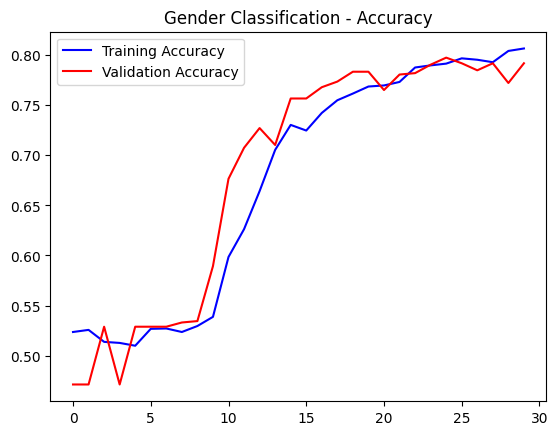

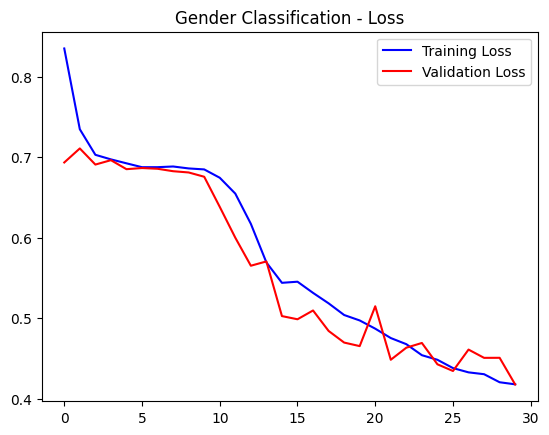

In [42]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Gender Classification - Accuracy')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Gender Classification - Loss')
plt.legend()
plt.show()

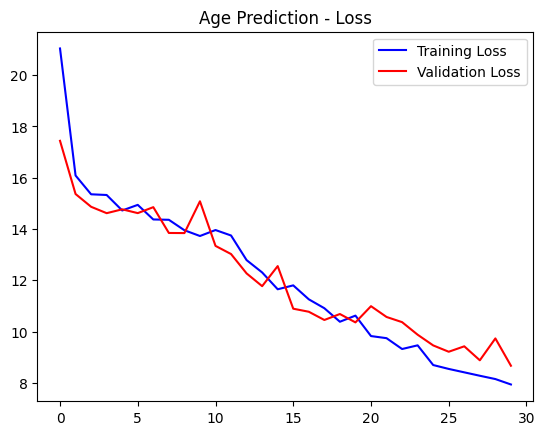

In [43]:
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Age Prediction - Loss')
plt.legend()
plt.show()

# Model Predictions

In [92]:
def make_prediction(age, gender, pixels):

  gender_dict = {0:'Male', 1:'Female'}

  print(f"Actual age: {age}")
  print(f"Actual gender {gender_dict[gender]}")

  m_prediction = model.predict(pixels.reshape(-1,48,48, 1))

  print(f"Predicted age: {round(m_prediction[1][0][0])}")
  print(f"Predicted gender: {gender_dict[round(m_prediction[0][0][0])]}")

  return

pred = test.sample()
make_prediction(pred.values[0][0], pred.values[0][1], pred.values[0][2])

Actual age: 38
Actual gender Male
1/1 [==============================] - 0s 126ms/step
Predicted age: 1786
Predicted gender: Male
